PCA:

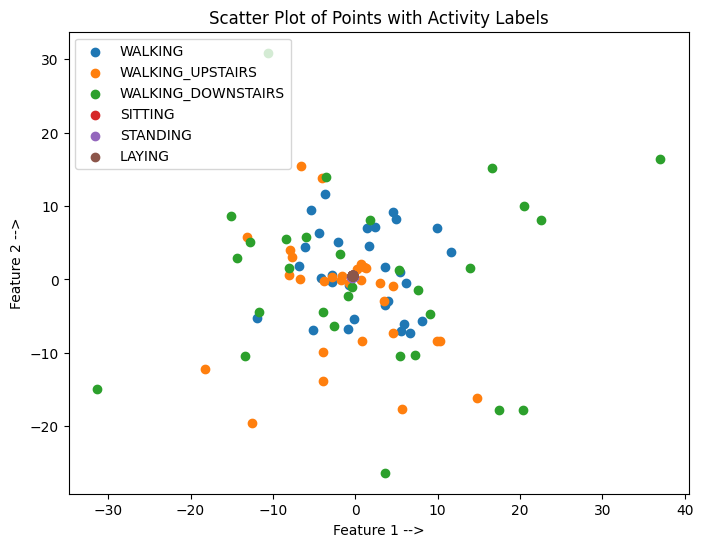

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from tsfel import time_series_features_extractor, get_features_by_domain
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')

X_data = []
for i in range(len(X_test)):
    temp = []
    for j in range(len(X_test[0])):
        temp.append(np.dot(X_test[i][j],np.transpose(X_test[i][j])))
    X_data.append(temp)

for i in range(len(X_train)):
    temp = []
    for j in range(len(X_train[0])):
        temp.append(np.dot(X_train[i][j],np.transpose(X_train[i][j])))
    X_data.append(temp)

for i in range(len(X_val)):
    temp = []
    for j in range(len(X_val[0])):
        temp.append(np.dot(X_val[i][j],np.transpose(X_val[i][j])))
    X_data.append(temp)

X_data = np.array(X_data)
y_data = np.array(list(y_test)+list(y_train)+list(y_val))
df = pd.DataFrame(X_data)
# df.columns = [i for i in range(100,600)]
scaling = StandardScaler()
scaling.fit(df)
Scaled_data = scaling.transform(df)
principal = PCA(n_components=2)
principal.fit(Scaled_data)
x = principal.transform(Scaled_data)

plt.figure(figsize=(8, 6))
for i, activity in enumerate(classes):
    indices = y_data == classes[activity]
    plt.scatter(x[indices, 0], x[indices, 1], label=activity)
    a=a+1
plt.xlabel('Feature 1 -->')
plt.ylabel('Feature 2 -->')

plt.title('Scatter Plot of Points with Activity Labels')
plt.legend()
plt.show()

TSFEL then PCA:

In [2]:
%pip install tsfel

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import tsfel

features = []

for i in range(4):
    features.append([])
    
for i in range(len(df)):
    features[0].append(tsfel.calc_mean(df[i]))
    
for i in range(len(df)):
    features[1].append(tsfel.calc_var(df[i]))
    
for i in range(len(df)):
    features[2].append(tsfel.skewness(df[i]))
    
for i in range(len(df)):
    features[3].append(tsfel.auc(df[i], 50))

In [31]:
features=np.array(features)
features=features.transpose()

In [35]:
print(features)

[[1.13429442 0.23394011 1.84797687 4.06018132]
 [1.17393178 0.31709304 2.46037068 4.20047109]
 [1.17157962 0.28579846 2.14823098 4.18401807]
 [1.18648431 0.33894194 2.12111407 4.22831907]
 [1.20269148 0.43183306 2.44779274 4.28099101]
 [1.17596518 0.34730208 2.23881289 4.19728657]
 [1.13694657 0.25192214 2.27268661 4.07091836]
 [1.12147668 0.20446396 2.17794958 4.02024281]
 [1.11385952 0.16745603 1.61987186 3.99521486]
 [1.08542881 0.14048453 1.13524137 3.89277493]
 [1.08364179 0.14051978 1.54735742 3.87916891]
 [1.08797759 0.17069387 2.24533086 3.88897567]
 [1.08049366 0.19387597 2.03200744 3.86132153]
 [1.09220781 0.2468485  3.23220606 3.90680135]
 [1.09173862 0.24775025 2.98399649 3.91064655]
 [1.0862497  0.26593486 2.83145752 3.89317799]
 [1.08459733 0.26388759 2.98551552 3.88778139]
 [1.08433611 0.2301647  2.35680531 3.88522229]
 [1.10395423 0.21250306 1.91259249 3.95349154]
 [1.11154806 0.20431434 2.13327394 3.9808015 ]
 [1.10476633 0.18129161 1.72706577 3.95523514]
 [1.10971872 

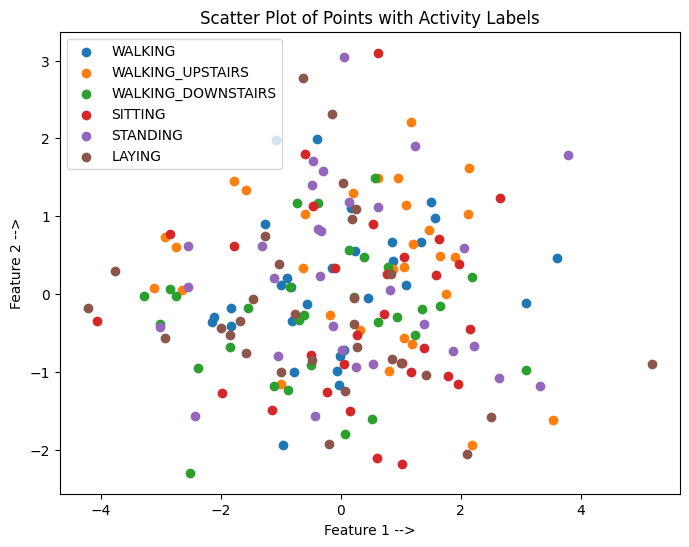

In [36]:
df2 = pd.DataFrame(features)
# df2.columns = [i for i in range(100,600)]
scaling = StandardScaler()
scaling.fit(df2)
Scaled_data = scaling.transform(df2)
principal = PCA(n_components=2)
principal.fit(Scaled_data)
x = principal.transform(Scaled_data)

plt.figure(figsize=(8, 6))
for i, activity in enumerate(classes):
    indices = y_data == classes[activity]
    plt.scatter(x[indices, 0], x[indices, 1], label=activity)
    a=a+1
plt.xlabel('Feature 1 -->')
plt.ylabel('Feature 2 -->')

plt.title('Scatter Plot of Points with Activity Labels')
plt.legend()
plt.show()